# **The impementation of my paper with 35000 data**

# Install necessary packages

In [88]:
!pip install -q pandas scikit-learn
!python3 --version
!pip install -q --upgrade pip
!pip install -q tensorflow
!pip install -q -U tensorflow
!python -m pip show -q tensorflow
!apt-get -qq install -q -y graphviz
!pip install -q pydot
!pip install -q tensorflow scikeras scikit-learn

Python 3.10.12


# Import necessary libraries

In [89]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import os
from IPython.core.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from tabulate import tabulate
from sklearn.impute import KNNImputer
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
import time
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor


# Define necessary functions

In [90]:
def convert_to_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

In [91]:
def alpha_trimmed_mean(data, alpha):
    if not 0 <= alpha < 0.5:
        raise ValueError("Alpha should be in the range [0, 0.5)")

    if not isinstance(data, np.ndarray):
        data = np.array(data)

    # Sorting the data
    sorted_data = np.sort(data)

    # Calculating the number of elements to trim
    n = len(data)
    trim = int(np.floor(alpha * n))

    # Trimming and calculating the mean
    trimmed_data = sorted_data[trim:n-trim]
    trimmed_mean = np.mean(trimmed_data)

    return trimmed_mean

In [92]:
def data_cleaning2(data):

    #filling missing values with the mean
    data['avg_speed(km/h)'].fillna(data['avg_speed(km/h)'].mean(), inplace=True)
    data['trip_distance(km)'].fillna(data['trip_distance(km)'].mean(), inplace=True)
    data['quantity(kWh)'].fillna(data['quantity(kWh)'].mean(), inplace=True)
    data['consumption(kWh/100km)'].fillna(data['consumption(kWh/100km)'].mean(), inplace=True)

    #for categorical type, fill missing values with the mode
    #(most frequently occurring category) of the column.

    mode = data['tire_type'].mode().iloc[0]
    data['tire_type'].fillna(mode, inplace=True)

    mode = data['driving_style'].mode().iloc[0]
    data['driving_style'].fillna(mode, inplace=True)

    return data

In [93]:
def alpha_trimmed_mean(data, alpha):
    if not 0 <= alpha < 0.5:
        raise ValueError("Alpha should be in the range [0, 0.5)")

    if not isinstance(data, np.ndarray):
        data = np.array(data)

    # Sorting the data
    sorted_data = np.sort(data)

    # Calculating the number of elements to trim
    n = len(data)
    trim = int(np.floor(alpha * n))

    # Trimming and calculating the mean
    trimmed_data = sorted_data[trim:n-trim]
    trimmed_mean = np.mean(trimmed_data)

    return trimmed_mean

In [94]:
def data_cleaning1(data):

    data.dropna(subset=['driving_style'], inplace=True)
    data.dropna(subset=['tire_type'], inplace=True)

    data.dropna(subset=['quantity(kWh)'], inplace=True)
    data.dropna(subset=['trip_distance(km)'], inplace=True)
    data.dropna(subset=['consumption(kWh/100km)'], inplace=True)

    null_avg_spd_data = data[data['avg_speed(km/h)'].isnull()]

    alpha = 0.1                  # Trimming 10% of data from each end

    mean = alpha_trimmed_mean(data['avg_speed(km/h)'], alpha)
    for index, row in data.iterrows() :
      if index in null_avg_spd_data.index :
          data.loc[index, 'avg_speed(km/h)'] = mean


    data.dropna(subset=['avg_speed(km/h)'], inplace=True)

    return data

In [95]:
def data_cleaning3(data):

    # Identify the numerical columns
    numerical_columns = data.select_dtypes(include=['number']).columns

    # Initialize the KNNImputer with the desired number of neighbors
    knn_imputer = KNNImputer(n_neighbors=3)

    # Impute missing values in the numerical columns
    data[numerical_columns] = knn_imputer.fit_transform(data[numerical_columns])

    return data

In [96]:
#defining a function for countplot
def create_countplot(data, column_name):
    sns.set(style="whitegrid") #set a style for the plot
    sns.countplot(data=data, x=column_name) #create the plot
    plt.title(f'Countplot of {column_name}')

In [97]:
#defining a function for histplot
def create_distribution_plot(data, column_name):
    sns.set(style="whitegrid") #set a style for the plot
    # 'kde=True' adds a kernel density estimate
    #sns.distplot(data=data, x=column_name, kde=True) #create the plot
    sns.distplot(data[column_name], kde = True)
    plt.title(f'Distribution Plot of {column_name}')

In [98]:
#defining a function for boxplot
def create_boxplot(data, column_name):
    sns.set(style="whitegrid") #set a style for the plot
    sns.boxplot(data=data, x=column_name) #create the plot
    plt.title(f'Boxplot of {column_name}')

In [99]:
#defining a function for violinplot
def create_violinplot(data, x, y):
    sns.set(style="whitegrid") #set a style for the plot
    sns.violinplot(x=x, y=y, data=data) #create the plot
    plt.title(f'Violin Plot for {y} vs {x}')

In [100]:
#defining a function for scatterplot
def create_scatterplot(data, x, y):
    sns.set(style="whitegrid") #set a style for the plot
    plt.scatter(data[x], data[y]) #create the plot
    plt.title(f'Scatter Plot for {y} vs {x}')

In [101]:
#defining a function for bivariate boxplot
def create_bivariate_boxplot(data, x, y):
    sns.set(style="whitegrid") #set a style for the plot
    sns.boxplot(x=x, y=y, data=data) #create the plot
    plt.title(f"Bivariate EDA Box Plot for {y} vs {x}")
    plt.show()

In [102]:
def create_displot(data, x, y):
    sns.set(style="whitegrid") #set a style for the plot
    sns.displot(data=data, x=x, kind='kde', hue=y) #create the plot
    plt.title(f'Displot for {y} vs {x}')
    plt.show()

In [103]:
def subplot_config():
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.7,
                        hspace=0.7)

In [104]:
def transform(a):
    atrs=[]
    for i in a:
        if i<30:
            i=20
        elif i < 50:
            i=30
        elif i<70:
            i=60
        elif i <100:
            i=80
        atrs.append(i)
    return atrs

In [105]:
def remove_outliers2(data, column_list,value):
    # Create a copy of the original DataFrame to avoid modifying it in-place
    cleaned_data = data.copy()

    for column in column_list:
        # Identify outliers using a boolean mask
        outliers_mask = (cleaned_data[column] > value)

        # Remove outliers from the DataFrame
        cleaned_data = cleaned_data.loc[~outliers_mask]

    return cleaned_data

In [106]:
def remove_outliers(data, column_list):
    # Create a copy of the original DataFrame to avoid modifying it in-place
    cleaned_data = data.copy()

    for column in column_list:
        # Calculate quartiles and IQR
        q1 = cleaned_data[column].quantile(0.25)
        q3 = cleaned_data[column].quantile(0.75)
        iqr = q3 - q1

        # Identify outliers using a boolean mask
        outliers_mask = (cleaned_data[column] < q1 - 1.5 * iqr) | (cleaned_data[column] > q3 + 1.5 * iqr)

        # Remove outliers from the DataFrame
        cleaned_data = cleaned_data.loc[~outliers_mask]

    return cleaned_data

In [107]:
#define the deep multi-layer perceptron model
def build_regressor():
    regressor = keras.models.Sequential()
    regressor.add(Dense(units=100, kernel_initializer='uniform', activation='relu', input_dim=len(X[0])))
    regressor.add(Dense(units=50, kernel_initializer='uniform', activation='relu'))
    regressor.add(Dense(units=25, kernel_initializer='uniform', activation='relu'))
    regressor.add(Dense(units=13, kernel_initializer='uniform', activation='relu'))
    regressor.add(Dense(units=7, kernel_initializer='uniform', activation='relu'))
    # activation func of the output layer must be 'linear' for regression tasks
    regressor.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
    regressor.compile(optimizer='adam', loss='mean_absolute_error')
    return regressor



In [108]:
from tensorflow.keras import regularizers


def build_regressor2(input_dim, alpha):
    regressor = keras.models.Sequential()
    regressor.add(Dense(units=100, kernel_initializer='uniform', activation='relu', input_dim=input_dim, kernel_regularizer=regularizers.l2(0.01)))
    regressor.add(Dense(units=50, kernel_initializer='uniform', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    regressor.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
    regressor.compile(optimizer='adam', loss='mean_absolute_error')
    return regressor

In [109]:
def do_kfold(model):
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=2)
    results = cross_validate(estimator=model, X=X, y=y, cv=cv, scoring=['neg_mean_absolute_error', 'r2'], n_jobs=-1)
    mae_values = results['test_neg_mean_absolute_error']
    r2_scores = results['test_r2']
    return mae_values, r2_scores

In [110]:
def do_kfold2(model):
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=2)
    results = cross_validate(estimator=model, X=X_train, y=y_train, cv=cv, scoring=['neg_mean_absolute_error', 'r2'], n_jobs=-1)
    mae_values = results['test_neg_mean_absolute_error']
    r2_scores = results['test_r2']
    return mae_values, r2_scores

In [111]:
# def do_fit_predict(model,X_t,y_t):
#     model.fit(X_t, y_t)
#     training_pred = model.predict(X_train)
#     test_pred = model.predict(X_test)
#     return training_pred, test_pred

In [112]:
def report_cross_val_results(mae_values, r2_scores):
    print("average MAE values (bias) is:", abs(round(number=mae_values.mean(), ndigits=3)))
    print("std deviation of MAE values (variance) is:", round(number=mae_values.std(), ndigits=3))
    best_mae = sorted(mae_values, reverse=False)[-1]
    print("best MAE value is:", abs(round(number=best_mae, ndigits=3)))

    print("average r2 scores (bias) is:", round(number=r2_scores.mean() , ndigits=3))
    print("std deviation of r2 scores (variance) is:", round(number=r2_scores.std() , ndigits=3))
    best_r2 = sorted(r2_scores, reverse=False)[-1]
    print("best r2 score is:", round(number=best_r2, ndigits=3))
    print("-------------------------------")

In [113]:
# def report_results(training_pred, test_pred):
#     print("MAE on training data: %.3f" % mean_absolute_error(y_true=y_train, y_pred=training_pred))
#     print("MAE on test data: %.3f" % mean_absolute_error(y_true=y_test, y_pred=test_pred))
#     print("variance score on training data: %.3f" % r2_score(y_true=y_train, y_pred=training_pred))
#     print("variance score on test data: %.3f" % r2_score(y_true=y_test, y_pred=test_pred))
#     print("-------------------------------")

In [114]:
def feature_extraction1(X):
    # columns_to_remove = ['motor_way', 'country_roads', 'consumption(kWh/100km)','park_heating']
    # columns_to_remove = [3, 4, 5, 7]
    columns_to_remove = [2]
    X = np.delete(X, columns_to_remove, axis=1)

    return X

In [115]:
def feature_extraction2(X):

    k = 5  # Number of features to select
    selector = SelectKBest(score_func=f_regression, k=k)
    X = selector.fit_transform(X, y)

    return X

In [116]:
def feature_extraction3(X):

    alpha = 0.01  # Regularization strength
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)  # Fit the Lasso model to your data
    # The coefficients of irrelevant features will be set to zero

    return X

In [117]:
def PCA_feature_extraction(X, n_components):

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    return X, pca

In [118]:
# Define your ELM model function
def create_elm_model(hidden_layer_size, activation='relu'):
    elm_model = MLPRegressor(hidden_layer_sizes=hidden_layer_size, activation=activation)
    return elm_model

In [119]:
def kFold_CV():

    #do the KFold cross-validation both with MAE values and r2 scores criteria
    elm_mae_values, elm_r2_scores = do_kfold(model=elm_model)

    xgb_mae_values, xgb_r2_scores = do_kfold(model=XGB_regressor)

    reg_mae_values, reg_r2_scores = do_kfold(model=linear_regressor)

    rf_mae_values, rf_r2_scores = do_kfold(model=rf)

    mlp_mae_values, mlp_r2_scores = do_kfold(model=mlp)

    ab_mae_values, ab_r2_scores = do_kfold(model=ab)

    deep_mlp_mae_values, deep_mlp_r2_scores = do_kfold(model=deep_mlp)

    svr_mae_values, svr_r2_scores = do_kfold(model=svr)


    #Print the result in CV (cross validation) table
    elm_best_mae = sorted(elm_mae_values, reverse=False)[-1]
    elm_best_r2 = sorted(elm_r2_scores, reverse=False)[-1]
    xgb_best_mae = sorted(xgb_mae_values, reverse=False)[-1]
    xgb_best_r2 = sorted(xgb_r2_scores, reverse=False)[-1]
    reg_best_mae = sorted(reg_mae_values, reverse=False)[-1]
    reg_best_r2 = sorted(reg_r2_scores, reverse=False)[-1]
    mlp_best_mae = sorted(mlp_mae_values, reverse=False)[-1]
    mlp_best_r2 = sorted(mlp_r2_scores, reverse=False)[-1]
    deep_mlp_best_mae = sorted(deep_mlp_mae_values, reverse=False)[-1]
    deep_mlp_best_r2 = sorted(deep_mlp_r2_scores, reverse=False)[-1]
    rf_best_mae = sorted(rf_mae_values, reverse=False)[-1]
    rf_best_r2 = sorted(rf_r2_scores, reverse=False)[-1]
    ab_best_mae = sorted(ab_mae_values, reverse=False)[-1]
    ab_best_r2 = sorted(ab_r2_scores, reverse=False)[-1]
    svr_best_mae = sorted(svr_mae_values, reverse=False)[-1]
    svr_best_r2 = sorted(svr_r2_scores, reverse=False)[-1]

    data = [
    ["Extreme Learning Model (ELM)", abs(round(number=elm_mae_values.mean(), ndigits=3)), abs(round(number=elm_best_mae, ndigits=3)), round(number=elm_r2_scores.mean(), ndigits=3),round(number=elm_best_r2, ndigits=3)],
    ["Extreme Gradient Boost (XGBoost)", abs(round(number=xgb_mae_values.mean(), ndigits=3)), abs(round(number=xgb_best_mae, ndigits=3)), round(number=xgb_r2_scores.mean() , ndigits=3),round(number=xgb_best_r2, ndigits=3)],
    ["Multiple Linear Regression (MLR)", abs(round(number=reg_mae_values.mean(), ndigits=3)), abs(round(number=reg_best_mae, ndigits=3)), round(number=reg_r2_scores.mean() , ndigits=3),round(number=reg_best_r2, ndigits=3)],
    ["Multilayer Perceptron (MLP)", abs(round(number=mlp_mae_values.mean(), ndigits=3)), abs(round(number=mlp_best_mae, ndigits=3)), round(number=mlp_r2_scores.mean() , ndigits=3),round(number=mlp_best_r2, ndigits=3)],
    ["Deep MLP", abs(round(number=deep_mlp_mae_values.mean(), ndigits=3)), abs(round(number=deep_mlp_best_mae, ndigits=3)), round(number=deep_mlp_r2_scores.mean() , ndigits=3),round(number=deep_mlp_best_r2, ndigits=3)],
    ["Random Forest (RF)", abs(round(number=rf_mae_values.mean(), ndigits=3)), abs(round(number=rf_best_mae, ndigits=3)), round(number=rf_r2_scores.mean() , ndigits=3),round(number=rf_best_r2, ndigits=3)],
    ["AdaBoost",abs(round(number=ab_mae_values.mean(), ndigits=3)), abs(round(number=ab_best_mae, ndigits=3)), round(number=ab_r2_scores.mean() , ndigits=3),round(number=ab_best_r2, ndigits=3)],
    ["Support Vector Regression (SVR)",abs(round(number=svr_mae_values.mean(), ndigits=3)), abs(round(number=svr_best_mae, ndigits=3)), round(number=svr_r2_scores.mean() , ndigits=3),round(number=svr_best_r2, ndigits=3)],
    ]
    table = tabulate(data, headers=["Model", "Average MAE value", "Best MAE value", "Average r2 score","Best r2 score"])

    # Adding a title
    title = f"CV Table 1, input X"
    formatted_table = f"{title}\n\n{table}"
    print(formatted_table)

In [120]:
def kFold_CV2():

    #do the KFold cross-validation both with MAE values and r2 scores criteria
    elm_mae_values, elm_r2_scores = do_kfold2(model=elm_model)

    xgb_mae_values, xgb_r2_scores = do_kfold2(model=XGB_regressor)

    reg_mae_values, reg_r2_scores = do_kfold2(model=linear_regressor)

    rf_mae_values, rf_r2_scores = do_kfold2(model=rf)

    mlp_mae_values, mlp_r2_scores = do_kfold2(model=mlp)

    ab_mae_values, ab_r2_scores = do_kfold2(model=ab)

    deep_mlp_mae_values, deep_mlp_r2_scores = do_kfold2(model=deep_mlp)

    svr_mae_values, svr_r2_scores = do_kfold2(model=svr)


    #Print the result in CV (cross validation) table
    elm_best_mae = sorted(elm_mae_values, reverse=False)[-1]
    elm_best_r2 = sorted(elm_r2_scores, reverse=False)[-1]
    xgb_best_mae = sorted(xgb_mae_values, reverse=False)[-1]
    xgb_best_r2 = sorted(xgb_r2_scores, reverse=False)[-1]
    reg_best_mae = sorted(reg_mae_values, reverse=False)[-1]
    reg_best_r2 = sorted(reg_r2_scores, reverse=False)[-1]
    mlp_best_mae = sorted(mlp_mae_values, reverse=False)[-1]
    mlp_best_r2 = sorted(mlp_r2_scores, reverse=False)[-1]
    deep_mlp_best_mae = sorted(deep_mlp_mae_values, reverse=False)[-1]
    deep_mlp_best_r2 = sorted(deep_mlp_r2_scores, reverse=False)[-1]
    rf_best_mae = sorted(rf_mae_values, reverse=False)[-1]
    rf_best_r2 = sorted(rf_r2_scores, reverse=False)[-1]
    ab_best_mae = sorted(ab_mae_values, reverse=False)[-1]
    ab_best_r2 = sorted(ab_r2_scores, reverse=False)[-1]
    svr_best_mae = sorted(svr_mae_values, reverse=False)[-1]
    svr_best_r2 = sorted(svr_r2_scores, reverse=False)[-1]

    data = [
    ["Extreme Learning Model (ELM)", abs(round(number=elm_mae_values.mean(), ndigits=3)), abs(round(number=elm_best_mae, ndigits=3)), round(number=elm_r2_scores.mean() , ndigits=3),round(number=elm_best_r2, ndigits=3)],
    ["Extreme Gradient Boost (XGBoost)", abs(round(number=xgb_mae_values.mean(), ndigits=3)), abs(round(number=xgb_best_mae, ndigits=3)), round(number=xgb_r2_scores.mean() , ndigits=3),round(number=xgb_best_r2, ndigits=3)],
    ["Multiple Linear Regression (MLR)", abs(round(number=reg_mae_values.mean(), ndigits=3)), abs(round(number=reg_best_mae, ndigits=3)), round(number=reg_r2_scores.mean() , ndigits=3),round(number=reg_best_r2, ndigits=3)],
    ["Multilayer Perceptron (MLP)", abs(round(number=mlp_mae_values.mean(), ndigits=3)), abs(round(number=mlp_best_mae, ndigits=3)), round(number=mlp_r2_scores.mean() , ndigits=3),round(number=mlp_best_r2, ndigits=3)],
    ["Deep MLP", abs(round(number=deep_mlp_mae_values.mean(), ndigits=3)), abs(round(number=deep_mlp_best_mae, ndigits=3)), round(number=deep_mlp_r2_scores.mean() , ndigits=3),round(number=deep_mlp_best_r2, ndigits=3)],
    ["Random Forest (RF)", abs(round(number=rf_mae_values.mean(), ndigits=3)), abs(round(number=rf_best_mae, ndigits=3)), round(number=rf_r2_scores.mean() , ndigits=3),round(number=rf_best_r2, ndigits=3)],
    ["AdaBoost",abs(round(number=ab_mae_values.mean(), ndigits=3)), abs(round(number=ab_best_mae, ndigits=3)), round(number=ab_r2_scores.mean() , ndigits=3),round(number=ab_best_r2, ndigits=3)],
    ["Support Vector Regression (SVR)",abs(round(number=svr_mae_values.mean(), ndigits=3)), abs(round(number=svr_best_mae, ndigits=3)), round(number=svr_r2_scores.mean() , ndigits=3),round(number=svr_best_r2, ndigits=3)],
    ]
    table = tabulate(data, headers=["Model", "Average MAE value", "Best MAE value", "Average r2 score","Best r2 score"])

    # Adding a title
    title = f"CV Table 2, input X_train"
    formatted_table = f"{title}\n\n{table}"
    print(formatted_table)

In [121]:
def online_prediction(model,outlier_columns):
    # Load data
    data = pd.read_csv(("/content/volsw_myBigdata.csv"))
    #time measurement
    start_time = time.time()
    # Drop the useless columns
    columns_to_drop = ['manufacturer', 'odometer','version', 'fuel_date','fuel_note','model','fuel_type','ecr_deviation']
    data = data.drop(columns=columns_to_drop)
    # Apply the function to the "trip_distance(km)"" column
    data['trip_distance(km)']  =data['trip_distance(km)'].apply(convert_to_float)
    data['quantity(kWh)']  =data['quantity(kWh)'].apply(convert_to_float)
    #Understanding outliers (outlier_columns for data with outliers is empty)
    data=remove_outliers2(data,{outlier_columns[2]},70)
    data=remove_outliers2(data,{outlier_columns[3]},100)
    data=remove_outliers2(data,{outlier_columns[0]},650)
    data=remove_outliers2(data,{outlier_columns[1]},110)
    #data preprocessing
    data=data_cleaning1(data)
    #Encoding categorical variables
    le1 = LabelEncoder()
    data['tire_type'] = le1.fit_transform(data['tire_type'])
    le2 = LabelEncoder()
    data['driving_style'] = le2.fit_transform(data['driving_style'])
    #feature engineering
    X = data.iloc[:, [0] + list(range(2, 12))].values
    y = data.iloc[:, 1].values
    X = feature_extraction1(X)
    # split the dataset into training-set and test-set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    # scale the values
    # sc = StandardScaler()
    # X_train = sc.fit_transform(X_train)
    # X_test = sc.fit_transform(X_test)
    #train the model and print the results on the never-seen-before test data
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    #Inference time measurement
    end_time = time.time()
    time_taken = end_time - start_time

    return train_pred,test_pred,time_taken,y_train,y_test

In [122]:
def online_prediction_scaler(model,outlier_columns):
    # Load data
    data = pd.read_csv(("/content/volsw_myBigdata.csv"))
    #time measurement
    start_time = time.time()
    # Drop the useless columns
    columns_to_drop = ['manufacturer', 'odometer','version', 'fuel_date','fuel_note','model','fuel_type','ecr_deviation']
    data = data.drop(columns=columns_to_drop)
    # Apply the function to the "trip_distance(km)"" column
    data['trip_distance(km)']  =data['trip_distance(km)'].apply(convert_to_float)
    data['quantity(kWh)']  =data['quantity(kWh)'].apply(convert_to_float)
    #Understanding outliers (outlier_columns for data with outliers is empty)
    data=remove_outliers2(data,{outlier_columns[2]},70)
    data=remove_outliers2(data,{outlier_columns[3]},100)
    data=remove_outliers2(data,{outlier_columns[0]},650)
    data=remove_outliers2(data,{outlier_columns[1]},140)
    #data preprocessing
    data=data_cleaning1(data)
    #Encoding categorical variables
    le1 = LabelEncoder()
    data['tire_type'] = le1.fit_transform(data['tire_type'])
    le2 = LabelEncoder()
    data['driving_style'] = le2.fit_transform(data['driving_style'])
    #feature engineering
    X = data.iloc[:, [0] + list(range(2, 12))].values
    y = data.iloc[:, 1].values
    X = feature_extraction1(X)
    # split the dataset into training-set and test-set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    # scale the values
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    #train the model and print the results on the never-seen-before test data
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    #Inference time measurement
    end_time = time.time()
    time_taken = end_time - start_time

    return train_pred,test_pred,time_taken,y_train,y_test

In [123]:
def combine_models(model1, model2):
    # Create the stacking model
    stacked_model = StackingRegressor(
        estimators=[('Model1', model1), ('Model2', model2)],
        final_estimator=LinearRegression()
    )

    return stacked_model

In [124]:
warnings.filterwarnings(action="ignore")
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 20)

## **1. Data Collection**





In [125]:
# Load data
data = pd.read_csv("/content/volsw_myBigdata.csv")

In [126]:
#Basic Exploration
#check the first few rows of the dataset to get an initial view of the data.
data.head()

,manufacturer,model,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note
0,Volkswagen,Golf,e-Golf,85,26.10.2023,114835.0,59,9.5,Electricity,Winter tires,1,0,1,Normal,16.1,1,0,46.0,3.4,11°C
1,Volkswagen,Golf,e-Golf,85,25.10.2023,114776.0,15,2.39,Electricity,Winter tires,1,0,1,Normal,15.9,1,0,36.0,3.2,NaN
2,Volkswagen,Golf,e-Golf,85,24.10.2023,114761.0,70,10.78,Electricity,Winter tires,1,0,1,Normal,15.4,1,0,48.0,2.7,11°C
3,Volkswagen,Golf,e-Golf,85,23.10.2023,114691.0,64,9.79,Electricity,Winter tires,1,0,1,Normal,13.0,1,0,46.0,0.3,13°C
4,Volkswagen,Golf,e-Golf,85,22.10.2023,114627.0,56,7.84,Electricity,Winter tires,1,0,1,Normal,14.0,1,0,55.0,1.3,16.5°C


In [127]:
#Data diemension
#find out the size of the dataset (number of rows and columns).
rows, columns = data.shape
print(data.shape)

(35747, 20)


## **2. Initial Data Preprocessing**



## Data Cleaning

In [128]:
# Drop the columns
columns_to_drop = ['manufacturer', 'odometer','version', 'fuel_date','fuel_note','model','fuel_type','ecr_deviation']
data = data.drop(columns=columns_to_drop)

In [129]:
#Basic Exploration
#Check the first few rows of the dataset to get an initial view of the data.
data.head()

,power(kW),trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h)
0,85,59,9.5,Winter tires,1,0,1,Normal,16.1,1,0,46.0
1,85,15,2.39,Winter tires,1,0,1,Normal,15.9,1,0,36.0
2,85,70,10.78,Winter tires,1,0,1,Normal,15.4,1,0,48.0
3,85,64,9.79,Winter tires,1,0,1,Normal,13.0,1,0,46.0
4,85,56,7.84,Winter tires,1,0,1,Normal,14.0,1,0,55.0


In [130]:
#Data types
#check the data types of each column (e.g., numerical, categorical).
data_types = data.dtypes
print(data_types)

power(kW)                   int64
trip_distance(km)          object
quantity(kWh)              object
tire_type                  object
city                        int64
motor_way                   int64
country_roads               int64
driving_style              object
consumption(kWh/100km)    float64
A/C                         int64
park_heating                int64
avg_speed(km/h)           float64
dtype: object


The type of "trip_distance(km)" is incorrect so we need to convert its type.

In [131]:
# Apply the function to the "trip_distance(km)"" column
data['trip_distance(km)']  =data['trip_distance(km)'].apply(convert_to_float)
data['quantity(kWh)']  =data['quantity(kWh)'].apply(convert_to_float)

data_types = data.dtypes
print(data_types)

power(kW)                   int64
trip_distance(km)         float64
quantity(kWh)             float64
tire_type                  object
city                        int64
motor_way                   int64
country_roads               int64
driving_style              object
consumption(kWh/100km)    float64
A/C                         int64
park_heating                int64
avg_speed(km/h)           float64
dtype: object


## Do initial EDA

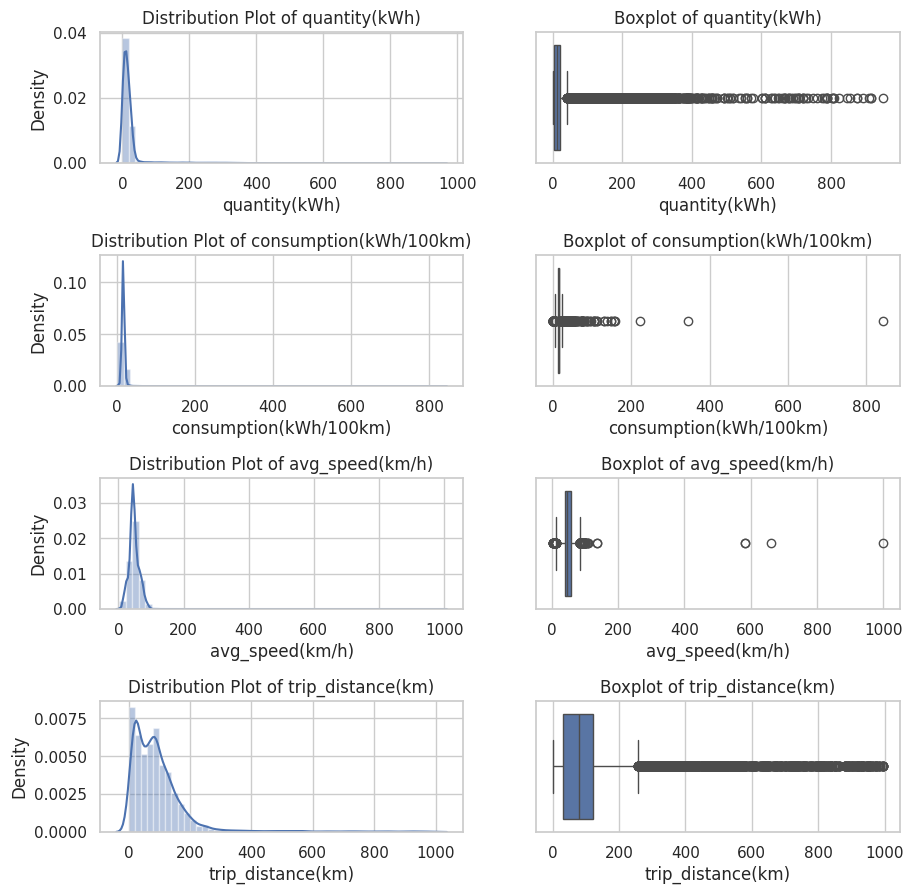

In [132]:
# subplot_config()
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.7)

plt.subplot(4, 2, 1)
#call the function to create a distribution plot for "quantity(kWh)"
create_distribution_plot(data,'quantity(kWh)')

plt.subplot(4, 2, 2)
#call the function to create a box plot for "quantity(kWh)"
create_boxplot(data,'quantity(kWh)')

plt.subplot(4, 2, 3)
#call the function to create a distribution plot for "consumption(kWh/100km)"
create_distribution_plot(data,'consumption(kWh/100km)')

plt.subplot(4, 2, 4)
#call the function to create a box plot for "consumption(kWh/100km)"
create_boxplot(data,'consumption(kWh/100km)')

plt.subplot(4, 2, 5)
#call the function to create a distribution plot for "avg_speed(km/h)"
create_distribution_plot(data,'avg_speed(km/h)')

plt.subplot(4, 2, 6)
#call the function to create a box plot for "avg_speed(km/h)"
create_boxplot(data,'avg_speed(km/h)')

plt.subplot(4, 2, 7)
#call the function to create a distribution plot for "trip_distance(km)"
create_distribution_plot(data,'trip_distance(km)')

plt.subplot(4, 2, 8)
#call the function to create a box plot for "trip_distance(km)"
create_boxplot(data,'trip_distance(km)')

plt.savefig('Initial EDA.png')


# Understanding the Outliers

# **Observation:**

For 'trip_distance(km)': The data more than 650 are outliers

For 'quantity(kWh)': The data more than 140 are outliers

For 'consumption(kWh/100km)': The data more than 70 are outliers

For 'avg_speed(km/h)': The data more than 100 are outliers

In [133]:
outlier_columns=[
       'trip_distance(km)', 'quantity(kWh)',
        'consumption(kWh/100km)',
       'avg_speed(km/h)']

In [134]:
data=remove_outliers2(data,{outlier_columns[2]},70)
data=remove_outliers2(data,{outlier_columns[3]},100)
data=remove_outliers2(data,{outlier_columns[0]},650)
data=remove_outliers2(data,{outlier_columns[1]},140)

In [135]:
data.isnull().sum()

power(kW)                     0
trip_distance(km)           660
quantity(kWh)               195
tire_type                    66
city                          0
motor_way                     0
country_roads                 0
driving_style              1506
consumption(kWh/100km)      414
A/C                           0
park_heating                  0
avg_speed(km/h)           20474
dtype: int64

## Handling missing data

In [136]:
data=data_cleaning1(data)

In [137]:
#identify columns with missing values
data.isnull().sum()

power(kW)                 0
trip_distance(km)         0
quantity(kWh)             0
tire_type                 0
city                      0
motor_way                 0
country_roads             0
driving_style             0
consumption(kWh/100km)    0
A/C                       0
park_heating              0
avg_speed(km/h)           0
dtype: int64

In [138]:
# store in a file
data.to_csv("/content/Cleaned_Data.csv", index= False)

# **3. Data Exploration (EDA)**

In [139]:
#load cleaned data
data = pd.read_csv("/content/Cleaned_Data.csv")

In [140]:
#Basic Exploration
#check the first few rows of the dataset to get an initial view of the data.
data.head()

,power(kW),trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h)
0,85,59.0,9.50,Winter tires,1,0,1,Normal,16.1,1,0,46.0
1,85,15.0,2.39,Winter tires,1,0,1,Normal,15.9,1,0,36.0
2,85,70.0,10.78,Winter tires,1,0,1,Normal,15.4,1,0,48.0
3,85,64.0,9.79,Winter tires,1,0,1,Normal,13.0,1,0,46.0
4,85,56.0,7.84,Winter tires,1,0,1,Normal,14.0,1,0,55.0


In [141]:
#Data types
#check the data types of each column
data_types = data.dtypes
print(data_types)

power(kW)                   int64
trip_distance(km)         float64
quantity(kWh)             float64
tire_type                  object
city                        int64
motor_way                   int64
country_roads               int64
driving_style              object
consumption(kWh/100km)    float64
A/C                         int64
park_heating                int64
avg_speed(km/h)           float64
dtype: object


# Univariate EDA

In [142]:
data['city'].value_counts()

city
1    10189
0     3711
Name: count, dtype: int64

In [143]:
data['motor_way'].value_counts()

motor_way
1    7185
0    6715
Name: count, dtype: int64

In [144]:
data['country_roads'].value_counts()

country_roads
1    10229
0     3671
Name: count, dtype: int64

In [145]:
data['A/C'].value_counts()

A/C
0    10205
1     3695
Name: count, dtype: int64

In [146]:
data['park_heating'].value_counts()

park_heating
0    11175
1     2725
Name: count, dtype: int64

In [147]:
data['power(kW)'].value_counts()

power(kW)
85     10955
100     2920
16        22
40         3
Name: count, dtype: int64

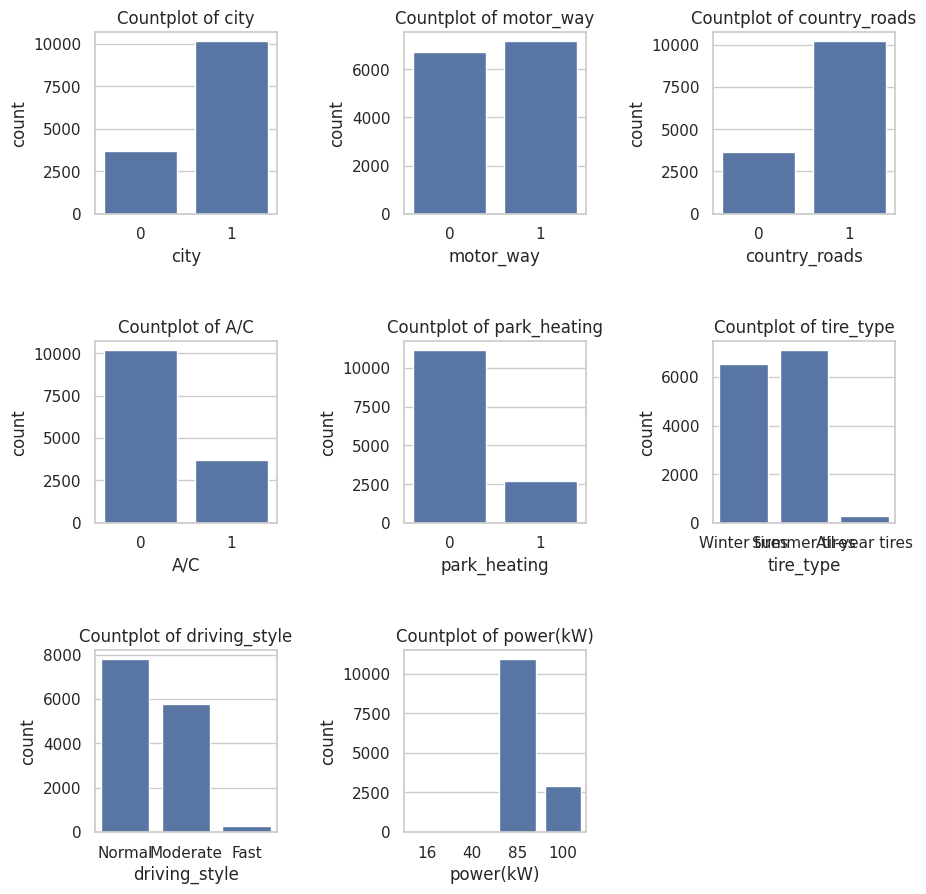

In [148]:
subplot_config()

plt.subplot(3, 3, 1)
#call the function to create a countplot for "city"
create_countplot(data,'city')

plt.subplot(3, 3, 2)
#call the function to create a countplot for "motor_way"
create_countplot(data,'motor_way')

plt.subplot(3, 3, 3)
#call the function to create a countplot for "country_roads"
create_countplot(data,'country_roads')

plt.subplot(3, 3, 4)
#call the function to create a countplot for "A/C"
create_countplot(data,'A/C')

plt.subplot(3, 3, 5)
#call the function to create a countplot for "park_heating"
create_countplot(data,'park_heating')

plt.subplot(3, 3, 6)
#call the function to create a countplot for "tire_type"
create_countplot(data,'tire_type')

plt.subplot(3, 3, 7)
#call the function to create a countplot for "driving_style"
create_countplot(data,'driving_style')

plt.subplot(3, 3, 8)
#call the function to create a countplot for "'power(kW)'"
create_countplot(data,'power(kW)')

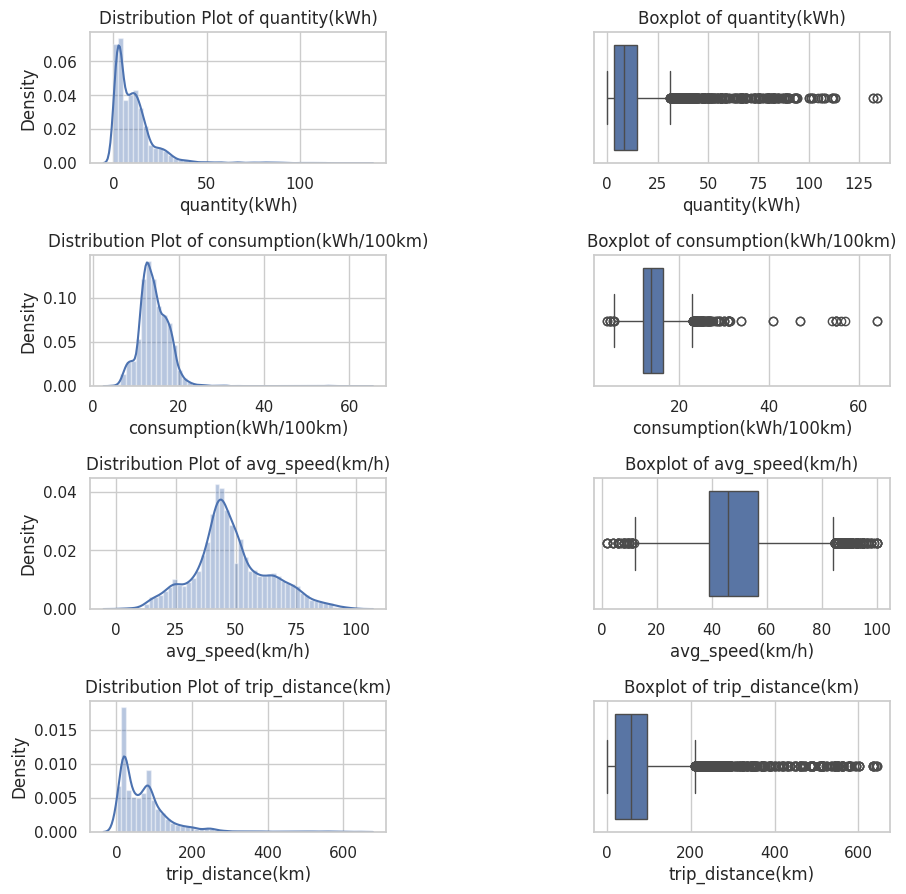

In [149]:
subplot_config()

plt.subplot(4, 2, 1)
#call the function to create a distribution plot for "quantity(kWh)"
create_distribution_plot(data,'quantity(kWh)')

plt.subplot(4, 2, 2)
#call the function to create a box plot for "quantity(kWh)"
create_boxplot(data,'quantity(kWh)')

plt.subplot(4, 2, 3)
#call the function to create a distribution plot for "consumption(kWh/100km)"
create_distribution_plot(data,'consumption(kWh/100km)')

plt.subplot(4, 2, 4)
#call the function to create a box plot for "consumption(kWh/100km)"
create_boxplot(data,'consumption(kWh/100km)')

plt.subplot(4, 2, 5)
#call the function to create a distribution plot for "avg_speed(km/h)"
create_distribution_plot(data,'avg_speed(km/h)')

plt.subplot(4, 2, 6)
#call the function to create a box plot for "avg_speed(km/h)"
create_boxplot(data,'avg_speed(km/h)')

plt.subplot(4, 2, 7)
#call the function to create a distribution plot for "trip_distance(km)"
create_distribution_plot(data,'trip_distance(km)')

plt.subplot(4, 2, 8)
#call the function to create a box plot for "trip_distance(km)"
create_boxplot(data,'trip_distance(km)')

The tire_type and driving_style are categorical.

In [150]:
#Handling Categorical Variables
#explore the unique values and their frequencies in categorical columns.
unique_values_tire = data['tire_type'].value_counts()
print(unique_values_tire)

unique_values_driving = data['driving_style'].value_counts()
print(unique_values_driving)

tire_type
Summer tires      7114
Winter tires      6514
All-year tires     272
Name: count, dtype: int64
driving_style
Normal      7821
Moderate    5797
Fast         282
Name: count, dtype: int64


# Bivariate EDA

Violin Plots:
Violin plots (available in seaborn) combine a box plot and a kernel density estimation to show the distribution of the data.

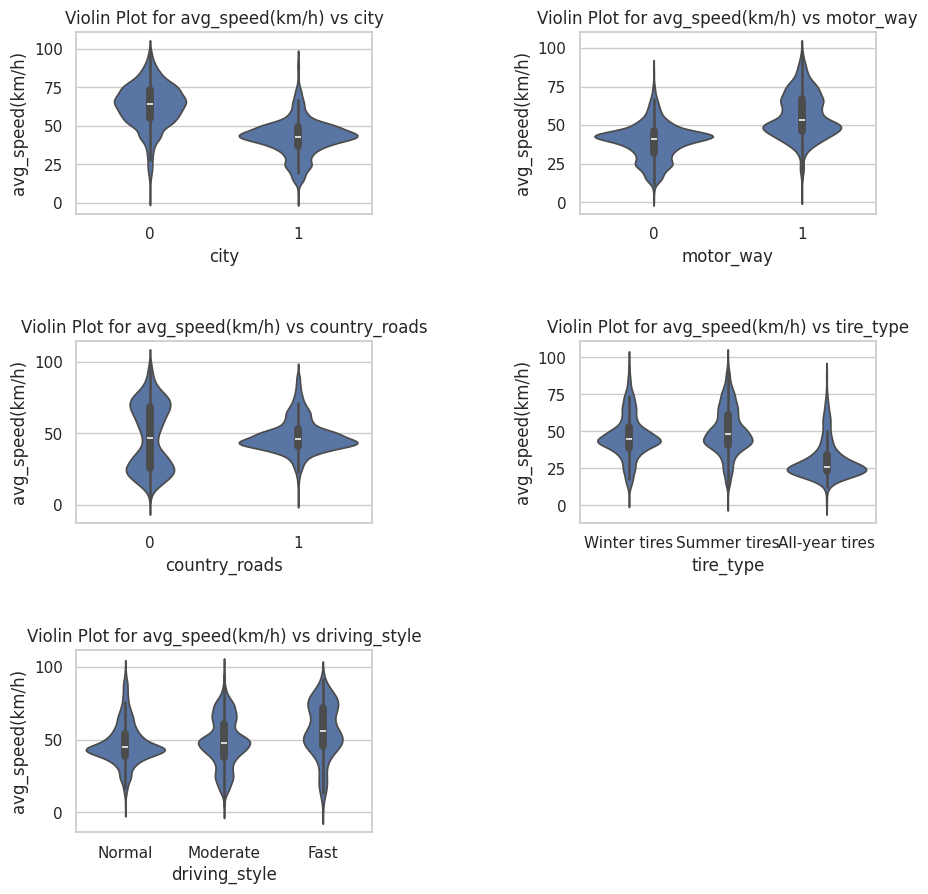

In [151]:
#plt.title("Average speeds distribution among city, motor_way, driving style, country_roads")
subplot_config()

plt.subplot(3, 2, 1)
#call the function to create a violinplot for "city"
create_violinplot(data,'city','avg_speed(km/h)')

plt.subplot(3, 2, 2)
#call the function to create aviolinplot for "motor_way"
create_violinplot(data,'motor_way','avg_speed(km/h)')

plt.subplot(3, 2, 3)
#call the function to create a violinplot for "country_roads"
create_violinplot(data,'country_roads','avg_speed(km/h)')

plt.subplot(3, 2, 4)
#call the function to create a violinplot for "tire_type"
create_violinplot(data,'tire_type','avg_speed(km/h)')

plt.subplot(3, 2, 5)
#call the function to create a violinplot for "driving_style"
create_violinplot(data,'driving_style','avg_speed(km/h)')


Scatter plots are a simple and effective way to visualize the relationship between two numerical variables.

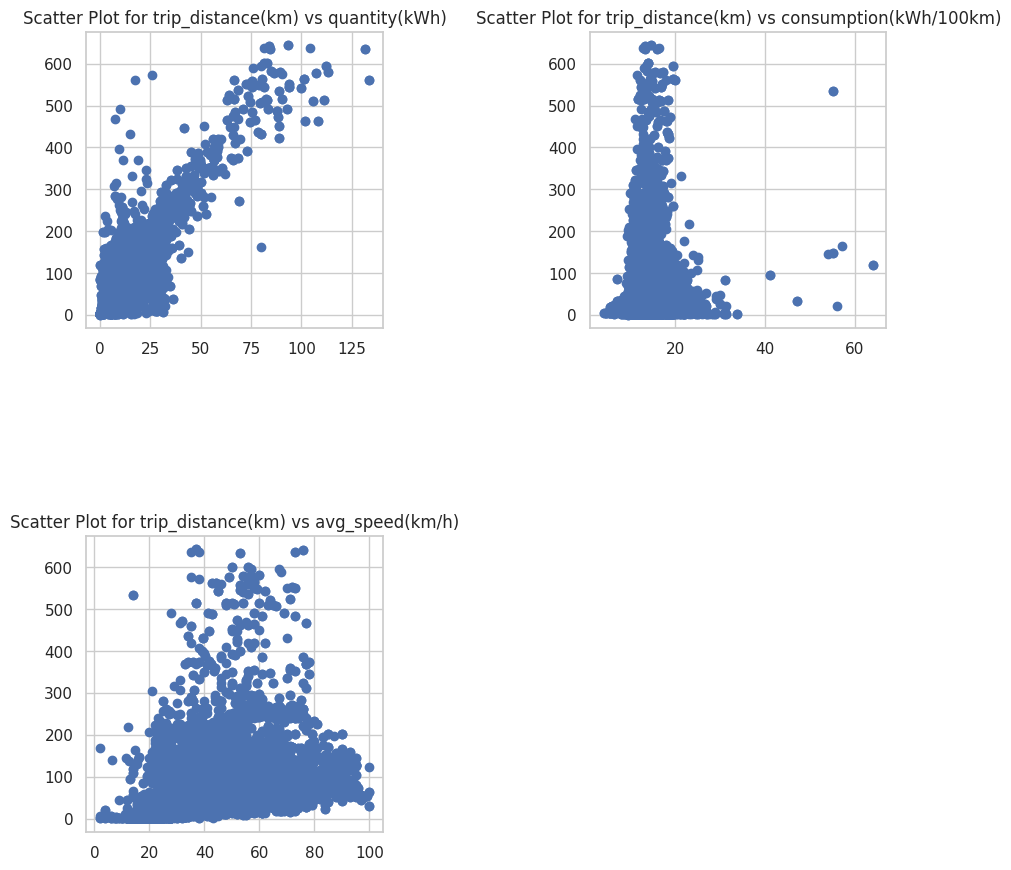

In [152]:
subplot_config()

plt.subplot(2, 2, 1)
#call the function to create a scatterplot for 'quantity(kWh)' vs 'trip_distance(km)'
create_scatterplot(data,'quantity(kWh)','trip_distance(km)')

plt.subplot(2, 2, 2)
#call the function to create scatterplot for 'consumption(kWh/100km)' vs 'trip_distance(km)'
create_scatterplot(data,'consumption(kWh/100km)','trip_distance(km)')

plt.subplot(2, 2, 3)
#call the function to create a scatterplot for 'avg_speed(km/h)' vs 'trip_distance(km)'
create_scatterplot(data,'avg_speed(km/h)','trip_distance(km)')

Box Plots:
Box plots are helpful for comparing a categorical variable against a numerical variable.

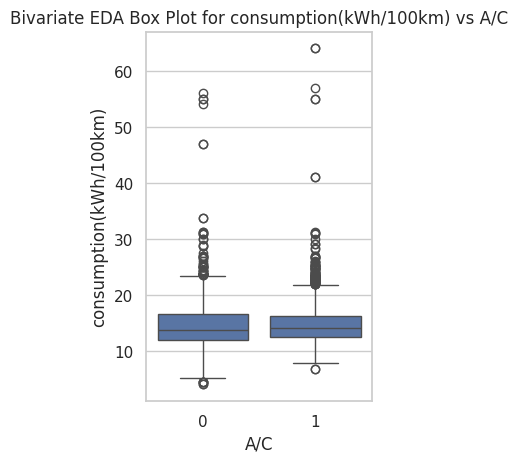

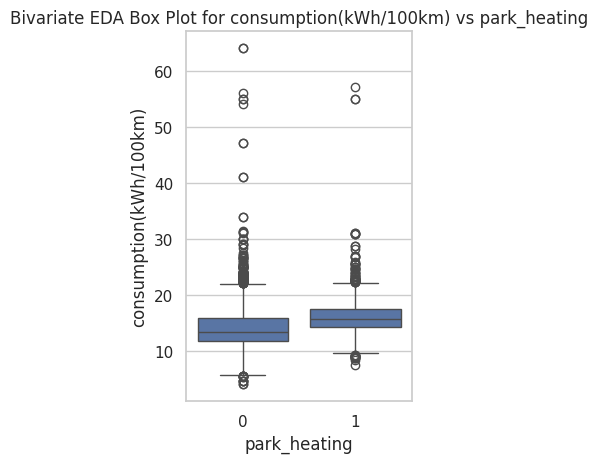

In [153]:
# A/C and park_heating in energy consumption
plt.subplot(1, 2, 1)
#call the function to create a boxplot for 'A/C' vs 'consumption(kWh/100km)'
create_bivariate_boxplot(data,'A/C','consumption(kWh/100km)')

plt.subplot(1, 2, 2)
#call the function to create boxplot for 'park_heating' vs 'consumption(kWh/100km)'
create_bivariate_boxplot(data,'park_heating','consumption(kWh/100km)')

<Figure size 1000x1000 with 0 Axes>

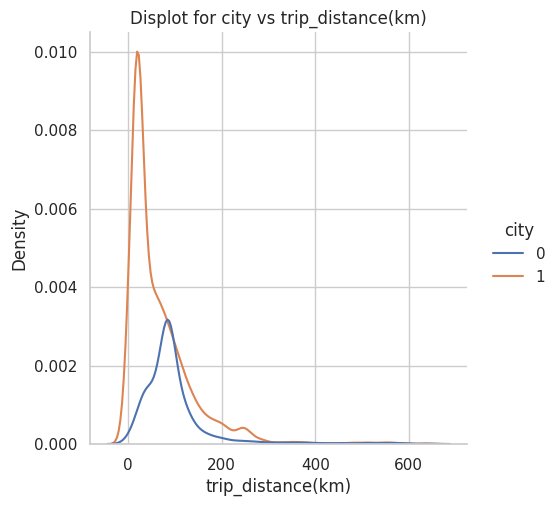

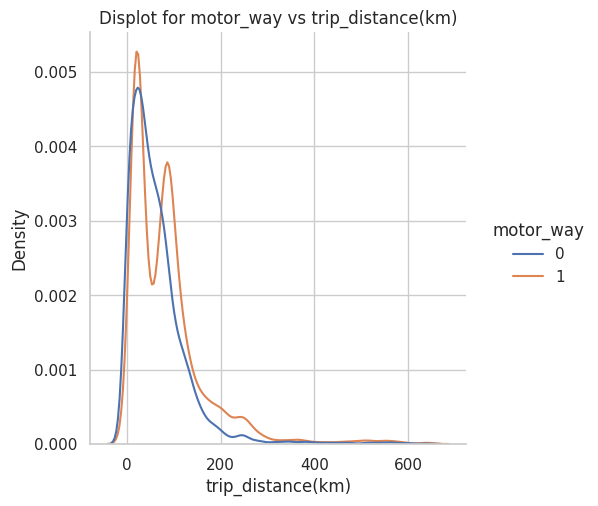

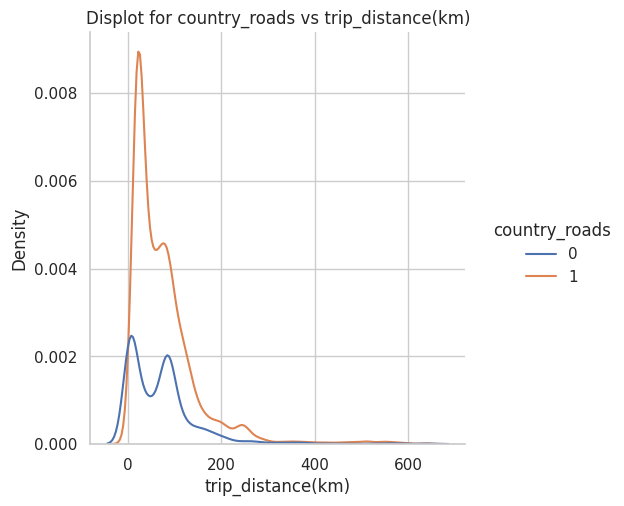

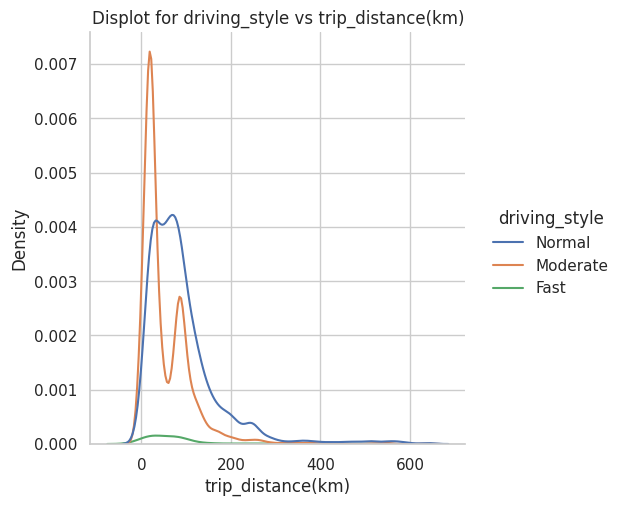

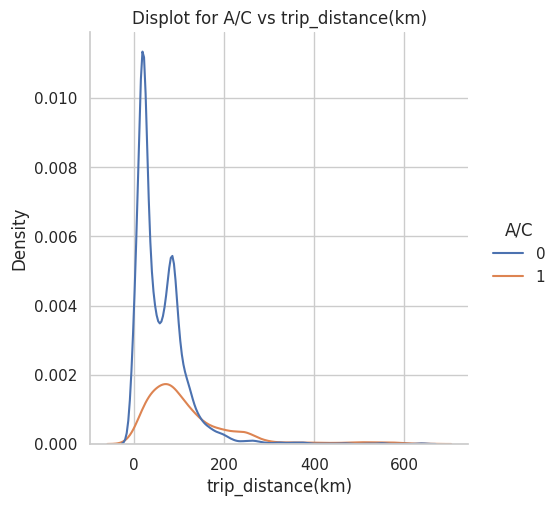

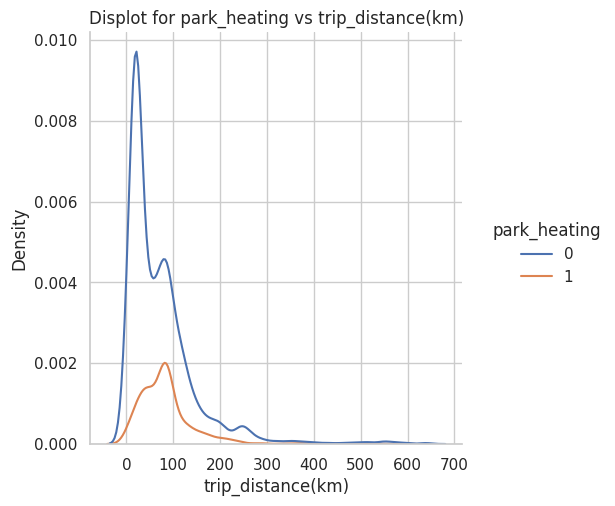

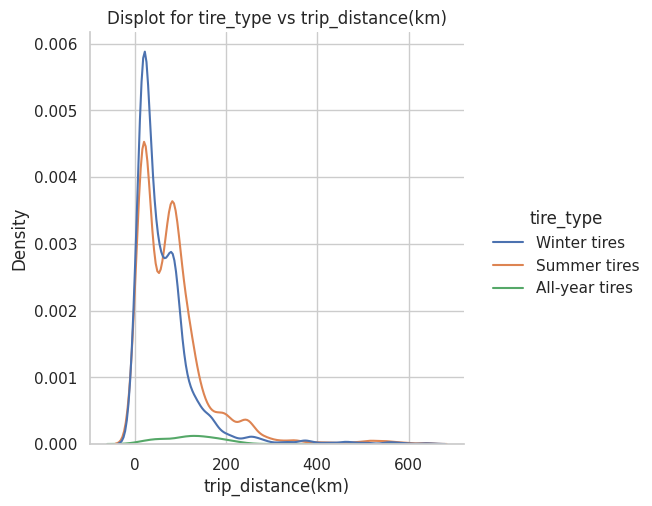

In [154]:
#plt.title("Average speeds distribution among city, motor_way, driving style, country_roads"
subplot_config()

# plt.subplot(4, 2, 1)
#call the function to create a displot for 'trip_distance(km)' vs 'city'
create_displot(data,'trip_distance(km)','city')

# plt.subplot(4, 2, 2)
#call the function to create a displot for 'trip_distance(km)' vs 'motor_way'
create_displot(data,'trip_distance(km)','motor_way')

# plt.subplot(4, 2, 3)
#call the function to create a displot for 'trip_distance(km)' vs 'country_roads'
create_displot(data,'trip_distance(km)','country_roads')

# plt.subplot(4, 2, 4)
#call the function to create a displot for 'trip_distance(km)' vs 'driving_style'
create_displot(data,'trip_distance(km)','driving_style')

# plt.subplot(4, 2, 5)
#call the function to create a displot for 'trip_distance(km)' vs 'A/C'
create_displot(data,'trip_distance(km)','A/C')

# plt.subplot(4, 2, 6)
#call the function to create a displot for 'trip_distance(km)' vs 'park_heating'
create_displot(data,'trip_distance(km)','park_heating')

# plt.subplot(4, 2, 7)
#call the function to create a displot for 'trip_distance(km)' vs 'tire_type'
create_displot(data,'trip_distance(km)','tire_type')


# **Observation:**

tire_type has no effect on trip_distance (km).

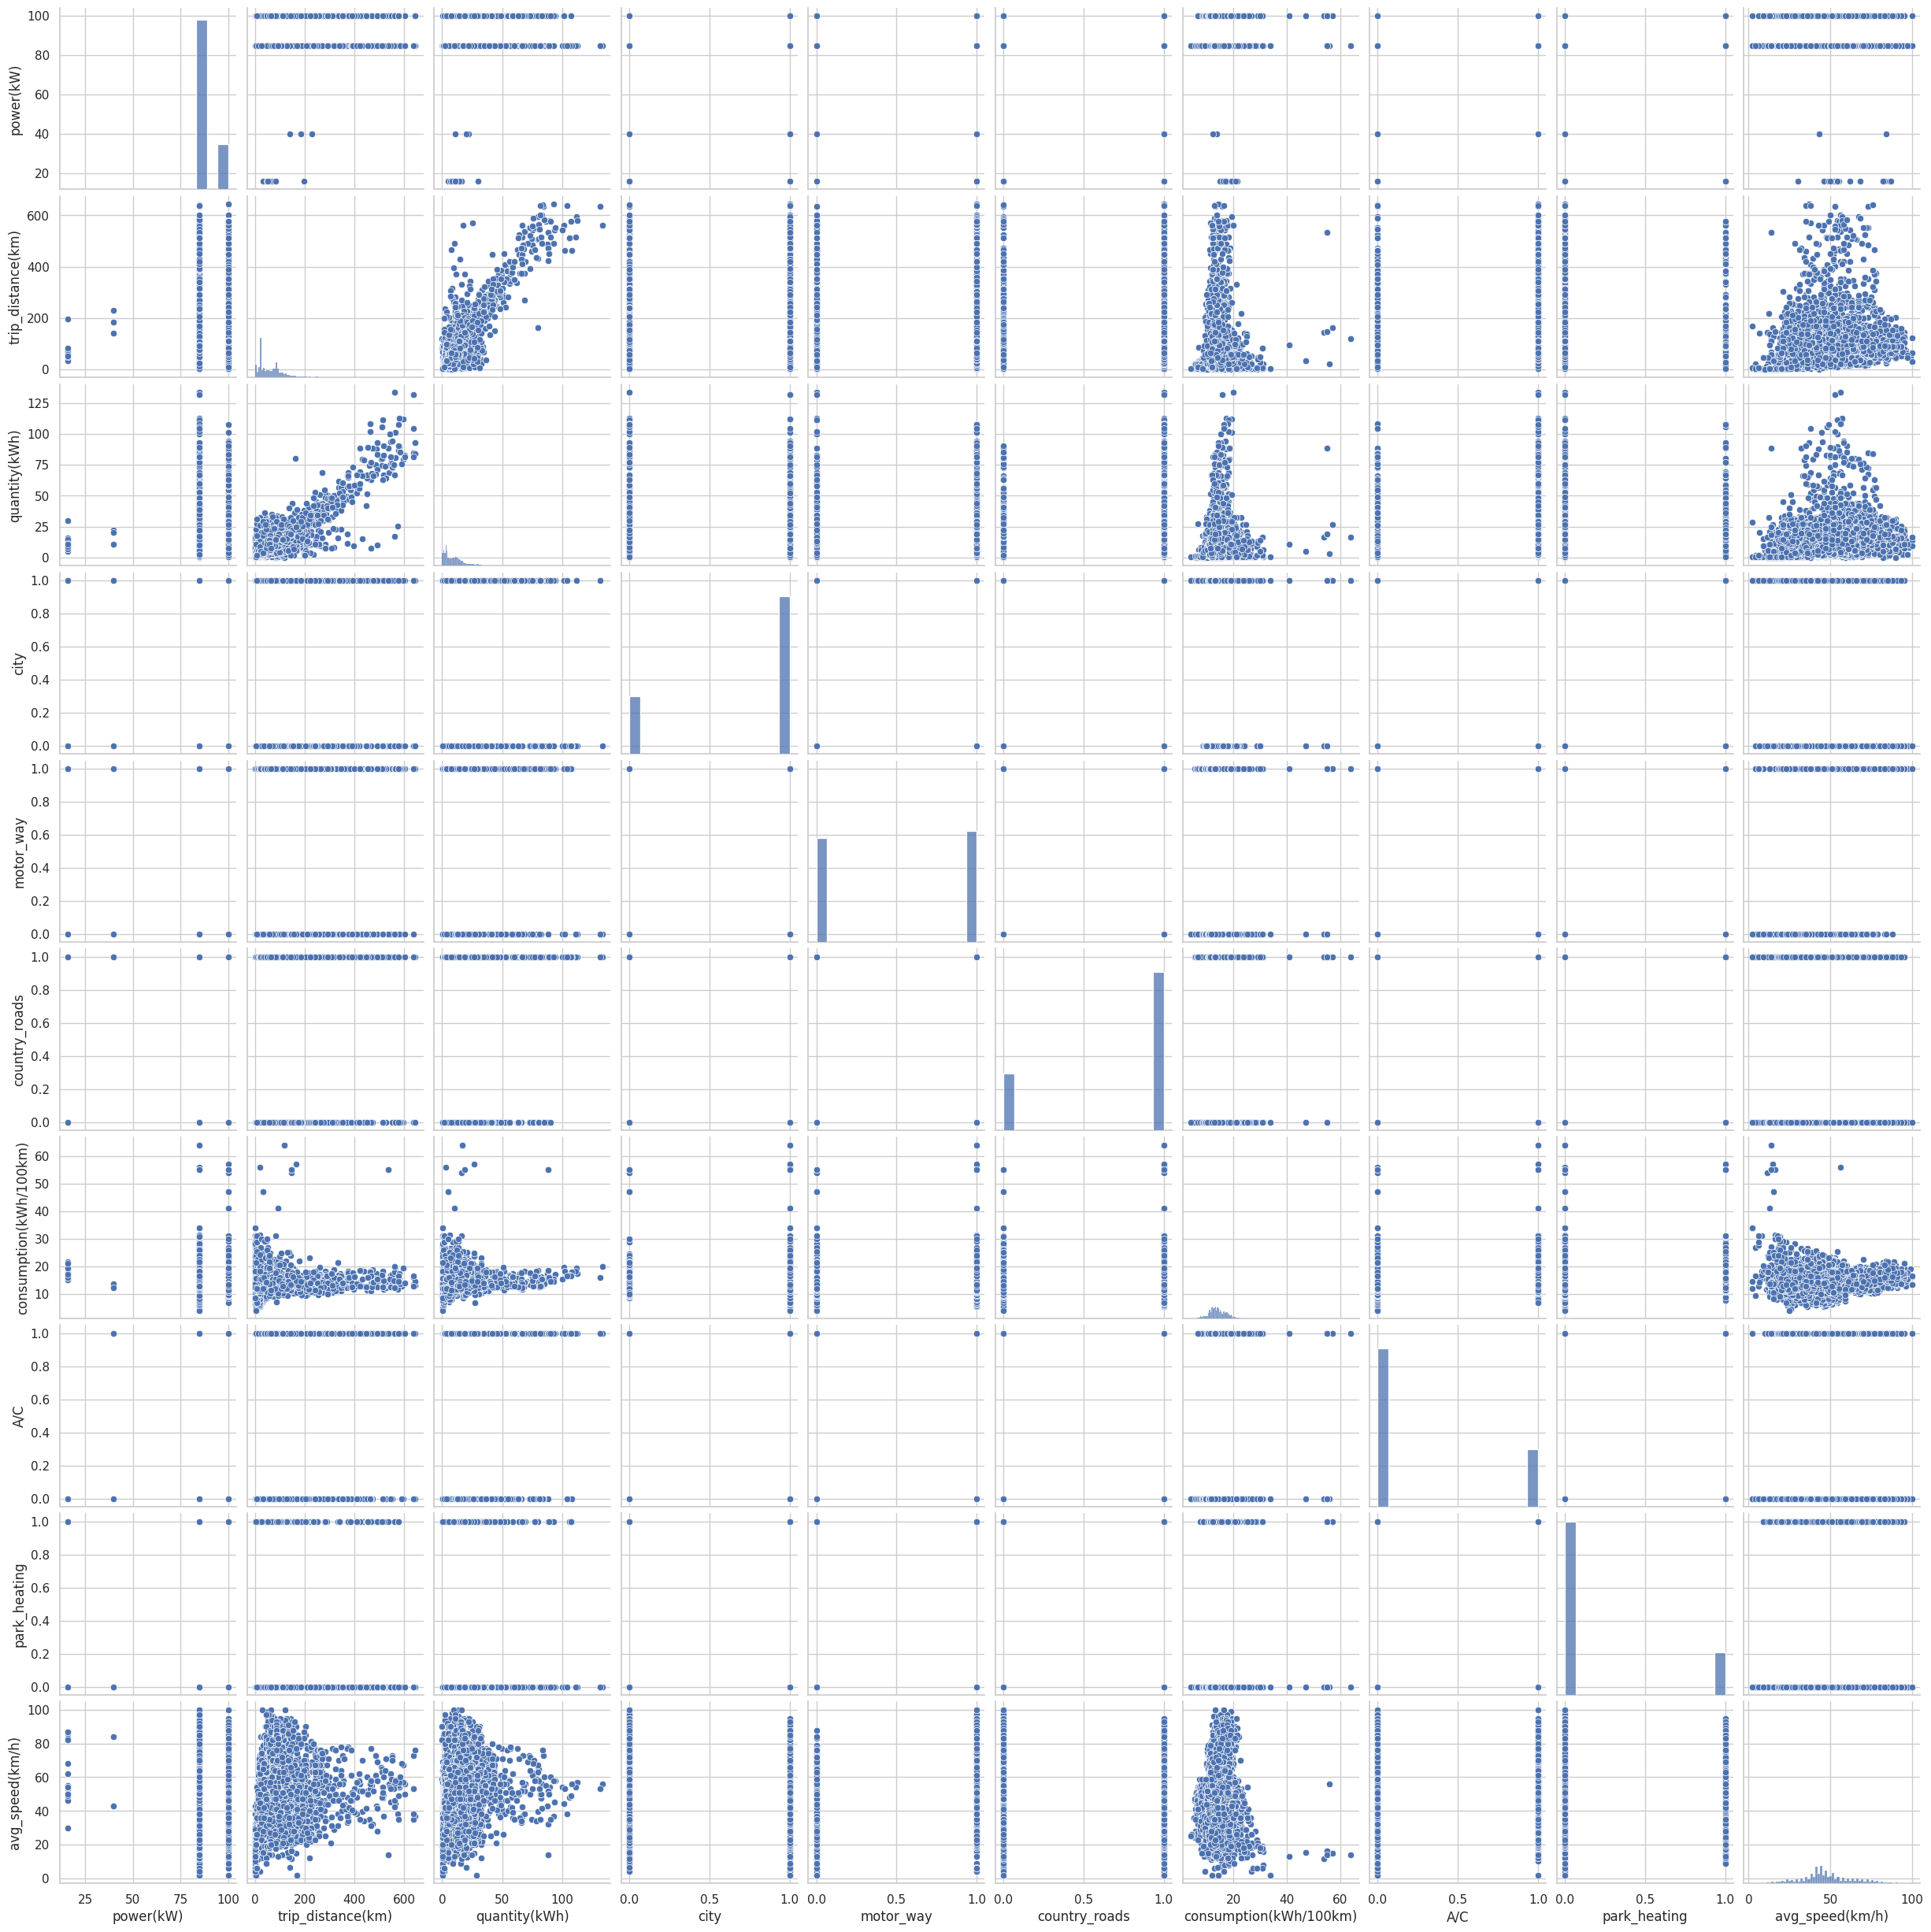

In [155]:
sns.pairplot(data)
plt.show()

# Multivariate EDA

In [156]:
data.corr(numeric_only=True)

,power(kW),trip_distance(km),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h)
power(kW),1.000000,0.411528,0.432718,0.117538,-0.040355,0.030977,0.075304,0.409694,0.153087,-0.090755
trip_distance(km),0.411528,1.000000,0.910362,-0.176947,0.146344,0.037400,-0.018018,0.348557,0.070708,0.259007
quantity(kWh),0.432718,0.910362,1.000000,-0.168368,0.126891,0.039976,0.111270,0.368589,0.155603,0.225655
city,0.117538,-0.176947,-0.168368,1.000000,-0.328288,0.330126,-0.025593,0.163992,-0.219353,-0.580898
motor_way,-0.040355,0.146344,0.126891,-0.328288,1.000000,-0.031819,0.029529,-0.075270,0.059266,0.522341
country_roads,0.030977,0.037400,0.039976,0.330126,-0.031819,1.000000,0.013639,0.267388,-0.093854,0.017538
consumption(kWh/100km),0.075304,-0.018018,0.111270,-0.025593,0.029529,0.013639,1.000000,0.072467,0.251451,-0.002245
A/C,0.409694,0.348557,0.368589,0.163992,-0.075270,0.267388,0.072467,1.000000,0.130287,-0.028126
park_heating,0.153087,0.070708,0.155603,-0.219353,0.059266,-0.093854,0.251451,0.130287,1.000000,0.126610
avg_speed(km/h),-0.090755,0.259007,0.225655,-0.580898,0.522341,0.017538,-0.002245,-0.028126,0.126610,1.000000


<Axes: >

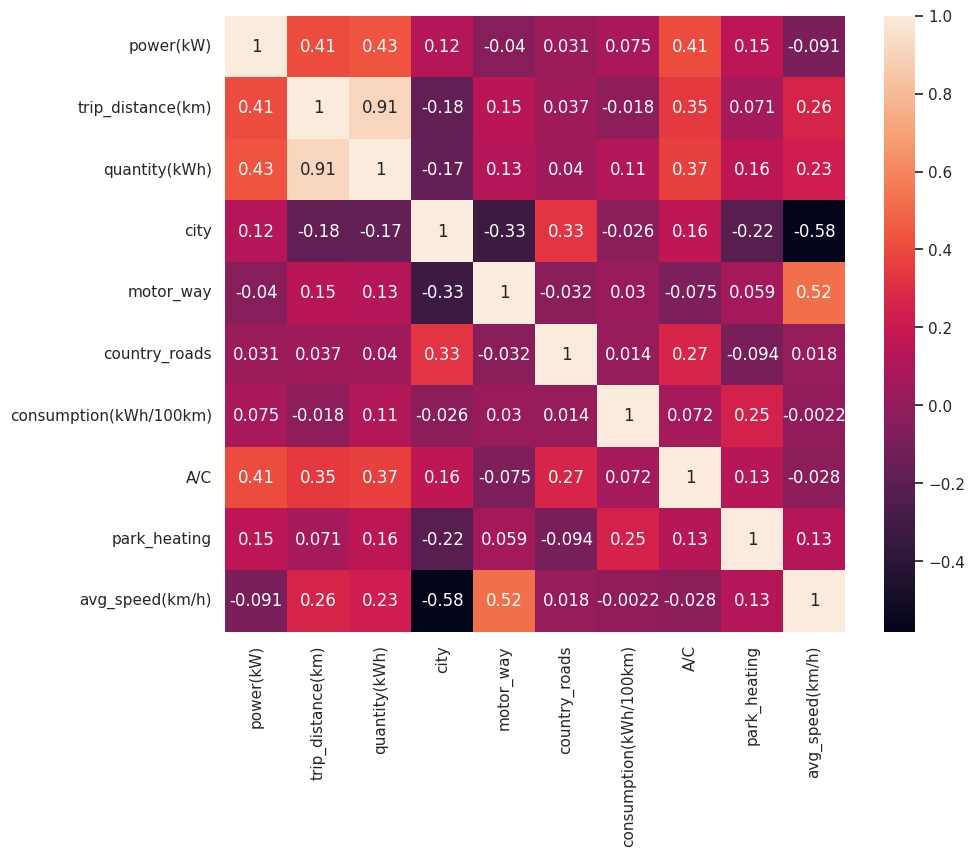

In [157]:
#Correlation Analysis
#calculate and visualize correlations between numerical features using a correlation matrix.
correlation_matrix = data.corr(numeric_only=True)

#visualize the correlations using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)

In [158]:
data.to_csv("/content/Cleaned_Data.csv",index=False)

# **4- Final Data Preprocessing**

#### preprocessing with_outlier_data

In [159]:
data = pd.read_csv("/content/Cleaned_Data.csv");
data.head()

,power(kW),trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h)
0,85,59.0,9.50,Winter tires,1,0,1,Normal,16.1,1,0,46.0
1,85,15.0,2.39,Winter tires,1,0,1,Normal,15.9,1,0,36.0
2,85,70.0,10.78,Winter tires,1,0,1,Normal,15.4,1,0,48.0
3,85,64.0,9.79,Winter tires,1,0,1,Normal,13.0,1,0,46.0
4,85,56.0,7.84,Winter tires,1,0,1,Normal,14.0,1,0,55.0


In [160]:
#Encoding categorical variables
le1 = LabelEncoder()
data['tire_type'] = le1.fit_transform(data['tire_type'])

le2 = LabelEncoder()
data['driving_style'] = le2.fit_transform(data['driving_style'])

In [161]:
# save file
data.to_csv("/content/Preprocessed_Data.csv", index=False)

# **5.1 - Feature Engineering**

## Data with outliers

In [162]:
data=pd.read_csv("/content/Preprocessed_Data.csv")

In [163]:
X = data.iloc[:, [0] + list(range(2, 12))].values
y = data.iloc[:, 1].values

In [164]:
X.shape[1]

11

In [165]:
X=feature_extraction1(X)

In [166]:
X.shape[1]

10

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

## **CV Grid Search for Hyperparameter Tuning**

## Create the Models

In [168]:
# Create Extreme Learning Machine model
hidden_layer_size = (150,)  #  number of neurons in the hidden layer
# elm_model = create_elm_model(hidden_layer_size)
elm_model = MLPRegressor(activation= 'tanh',hidden_layer_sizes=hidden_layer_size, alpha=0.01, random_state=42)

In [169]:
# Create the Extreme Gradient Boost regressor model
XGB_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.15, max_depth=3)

In [170]:
#Create the linear regression mode
linear_regressor = LinearRegression()

In [171]:
# Create the shallow multi-layer perceptron model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, n_iter_no_change=100, activation='relu',alpha= 0.01,
                   solver='adam', verbose=False, warm_start=False, learning_rate='constant', random_state=42)


In [172]:
# Create the random forest ensemble model
rf = RandomForestRegressor(
    n_estimators=250,         # Reduced the number of estimators
    max_depth=10,              # Limit the maximum depth of each tree
    min_samples_split=5,       # Increased the minimum number of samples required to split an internal node
    min_samples_leaf=2,        # Increased the minimum number of samples required to be at a leaf node
    random_state=42
)

In [173]:
# Creaye the deep MLP model
# deep_mlp = KerasRegressor(build_fn=build_regressor, batch_size=16, epochs=10, verbose=False)

deep_mlp = MLPRegressor(
    activation='relu',
    alpha=0.01,
    hidden_layer_sizes=(100, 50,13,7),
    learning_rate='constant',
    random_state=42,
    solver='adam'
)

In [175]:
# Creaye the ada-boost ensemble model

ab = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=200,
    learning_rate=0.01,
    random_state=42,
    loss='exponential'
)

In [176]:

# Create the SVR model with regularization
svr = SVR(
    C=1,           # Regularization parameter (adjust the cost of constraints violation)
    epsilon=0.5,     # Epsilon in the epsilon-SVR model (width of the epsilon-tube)
    kernel='rbf'     # Radial basis function (RBF) kernel
)

In [177]:
#combination of rf and xgb
rf_xgb=combine_models(rf, XGB_regressor)

In [178]:
#combination of rf and xgb
elm_xgb=combine_models(elm_model, XGB_regressor)

In [179]:
#combination of linear regression and elm
reg_xgb=combine_models(XGB_regressor, linear_regressor)

In [180]:
#combination of linear regression and mlp
reg_mlp=combine_models(linear_regressor,mlp)

In [181]:
#combination of RF and mlp
rf_mlp=combine_models(rf, mlp)

# **6.2 - K-fold Cross Validation**

## Data without outliers

In [182]:
kFold_CV()#feeding whole input data X

CV Table 1, input X

Model                               Average MAE value    Best MAE value    Average r2 score    Best r2 score
--------------------------------  -------------------  ----------------  ------------------  ---------------
Extreme Learning Model (ELM)                   12.357            11.818               0.894            0.909
Extreme Gradient Boost (XGBoost)               12.373            11.872               0.904            0.918
Multiple Linear Regression (MLR)               16.628            16.035               0.853            0.868
Multilayer Perceptron (MLP)                    12.635            12.046               0.901            0.913
Deep MLP                                       13.182            12.191               0.898            0.911
Random Forest (RF)                             10.274             9.816               0.919            0.931
AdaBoost                                       16.001            15.6                 0.88             0.89

In [183]:
# kFold_CV2()#feeding training input data X_train

# **7 - Model Implementation for Prediction**

## **online Prediction**

In [184]:
outlier_columns=[
       'trip_distance(km)', 'quantity(kWh)',
        'consumption(kWh/100km)',
       'avg_speed(km/h)']

In [185]:
elm_train_pred,elm_test_pred,elm_time_taken,elm_y_train,elm_y_test=online_prediction(elm_model,outlier_columns)
xgb_train_pred,xgb_test_pred,xgb_time_taken,xgb_y_train,xgb_y_test=online_prediction(XGB_regressor,outlier_columns)
reg_train_pred,reg_test_pred,reg_time_taken,reg_y_train,reg_y_test=online_prediction_scaler(linear_regressor,outlier_columns)
mlp_train_pred,mlp_test_pred,mlp_time_taken,mlp_y_train,mlp_y_test=online_prediction_scaler(mlp,outlier_columns)
rf_train_pred,rf_test_pred,rf_time_taken,rf_y_train,rf_y_test=online_prediction(rf,outlier_columns)
ab_train_pred,ab_test_pred,ab_time_taken,ab_y_train,ab_y_test=online_prediction(ab,outlier_columns)
deep_mlp_train_pred,deep_mlp_test_pred,deep_mlp_time_taken,deep_mlp_y_train,deep_mlp_y_test=online_prediction_scaler(deep_mlp,outlier_columns)
rf_xgb_train_pred,rf_xgb_test_pred,rf_xgb_time_taken,rf_xgb_y_train,rf_xgb_y_test=online_prediction(rf_xgb,outlier_columns)
elm_xgb_train_pred,elm_xgb_test_pred,elm_xgb_time_taken,elm_xgb_y_train,elm_xgb_y_test=online_prediction(elm_xgb,outlier_columns)
reg_xgb_train_pred,reg_xgb_test_pred,reg_xgb_time_taken,reg_xgb_y_train,reg_xgb_y_test=online_prediction(reg_xgb,outlier_columns)
reg_mlp_train_pred,reg_mlp_test_pred,reg_mlp_time_taken,reg_mlp_y_train,reg_mlp_y_test=online_prediction(reg_mlp,outlier_columns)
rf_mlp_train_pred,rf_mlp_test_pred,rf_mlp_time_taken,rf_mlp_y_train,rf_mlp_y_test=online_prediction(rf_mlp,outlier_columns)

#Print the Prediction results in prediction table
TestSetSize=0.3;

data = [
["Extreme Learning Model (ELM)", round(mean_absolute_error(y_true=elm_y_train, y_pred=elm_train_pred),3),round(mean_absolute_error(y_true=elm_y_test, y_pred=elm_test_pred), 3),round(r2_score(y_true=elm_y_train, y_pred=elm_train_pred), 3),round(r2_score(y_true=elm_y_test, y_pred=elm_test_pred), 3),elm_time_taken,TestSetSize],
["Extreme Gradient Boost (XGBoost)", round(mean_absolute_error(y_true=xgb_y_train, y_pred=xgb_train_pred),3),round(mean_absolute_error(y_true=xgb_y_test, y_pred=xgb_test_pred), 3),round(r2_score(y_true=xgb_y_train, y_pred=xgb_train_pred), 3),round(r2_score(y_true=xgb_y_test, y_pred=xgb_test_pred), 3),xgb_time_taken,TestSetSize],
["Multiple Linear Regression (MLR)", round(mean_absolute_error(y_true=reg_y_train, y_pred=reg_train_pred),3),round(mean_absolute_error(y_true=reg_y_test, y_pred=reg_test_pred), 3),round(r2_score(y_true=reg_y_train, y_pred=reg_train_pred), 3),round(r2_score(y_true=reg_y_test, y_pred=reg_test_pred), 3),reg_time_taken,TestSetSize],
["Multilayer Perceptron (MLP)", round(mean_absolute_error(y_true=mlp_y_train, y_pred=mlp_train_pred),3),round(mean_absolute_error(y_true=mlp_y_test, y_pred=mlp_test_pred), 3),round(r2_score(y_true=mlp_y_train, y_pred=mlp_train_pred), 3),round(r2_score(y_true=mlp_y_test, y_pred=mlp_test_pred), 3),mlp_time_taken,TestSetSize],
["Deep MLP", round(mean_absolute_error(y_true=deep_mlp_y_train, y_pred=deep_mlp_train_pred), 3),round(mean_absolute_error(y_true=deep_mlp_y_test, y_pred=deep_mlp_test_pred), 3),round(r2_score(y_true=deep_mlp_y_train, y_pred=deep_mlp_train_pred),3),round(r2_score(y_true=deep_mlp_y_test, y_pred=deep_mlp_test_pred), 3),deep_mlp_time_taken,TestSetSize],
["Random Forest (RF)", round(mean_absolute_error(y_true=rf_y_train, y_pred=rf_train_pred), 3),round(mean_absolute_error(y_true=rf_y_test, y_pred=rf_test_pred), 3),round(r2_score(y_true=rf_y_train, y_pred=rf_train_pred), 3),round(r2_score(y_true=rf_y_test, y_pred=rf_test_pred),3),rf_time_taken,TestSetSize],
["AdaBoost", round(mean_absolute_error(y_true=ab_y_train, y_pred=ab_train_pred), 3),round(mean_absolute_error(y_true=ab_y_test, y_pred=ab_test_pred), 3),round(r2_score(y_true=ab_y_train, y_pred=ab_train_pred), 3),round(r2_score(y_true=ab_y_test, y_pred=ab_test_pred), 3),ab_time_taken,TestSetSize],
["RF and XGB", round(mean_absolute_error(y_true=rf_xgb_y_train, y_pred=rf_xgb_train_pred), 3),round(mean_absolute_error(y_true=rf_xgb_y_test, y_pred=rf_xgb_test_pred), 3),round(r2_score(y_true=rf_xgb_y_train, y_pred=rf_xgb_train_pred), 3),round(r2_score(y_true=rf_xgb_y_test, y_pred=rf_xgb_test_pred), 3),rf_xgb_time_taken,TestSetSize],
["ELM and XGBoost", round(mean_absolute_error(y_true=elm_xgb_y_train, y_pred=elm_xgb_train_pred), 3),round(mean_absolute_error(y_true=elm_xgb_y_test, y_pred=elm_xgb_test_pred), 3),round(r2_score(y_true=elm_xgb_y_train, y_pred=elm_xgb_train_pred), 3),round(r2_score(y_true=elm_xgb_y_test, y_pred=elm_xgb_test_pred), 3),elm_xgb_time_taken,TestSetSize],
["MLR and XGBoost", round(mean_absolute_error(y_true=reg_xgb_y_train, y_pred=reg_xgb_train_pred), 3),round(mean_absolute_error(y_true=reg_xgb_y_test, y_pred=reg_xgb_test_pred), 3),round(r2_score(y_true=reg_xgb_y_train, y_pred=reg_xgb_train_pred), 3),round(r2_score(y_true=reg_xgb_y_test, y_pred=reg_xgb_test_pred), 3),reg_xgb_time_taken,TestSetSize],
["MLR and MLP", round(mean_absolute_error(y_true=reg_mlp_y_train, y_pred=reg_mlp_train_pred), 3),round(mean_absolute_error(y_true=reg_mlp_y_test, y_pred=reg_mlp_test_pred), 3),round(r2_score(y_true=reg_mlp_y_train, y_pred=reg_mlp_train_pred), 3),round(r2_score(y_true=reg_mlp_y_test, y_pred=reg_mlp_test_pred), 3),reg_mlp_time_taken,TestSetSize],
["RF and MLP", round(mean_absolute_error(y_true=rf_mlp_y_train, y_pred=rf_mlp_train_pred), 3),round(mean_absolute_error(y_true=rf_mlp_y_test, y_pred=rf_mlp_test_pred), 3),round(r2_score(y_true=rf_mlp_y_train, y_pred=rf_mlp_train_pred), 3),round(r2_score(y_true=rf_mlp_y_test, y_pred=rf_mlp_test_pred), 3),rf_mlp_time_taken,TestSetSize]
]
table = tabulate(data, headers=["Model", "MAE on training data", "MAE on test data", "r2 score on training data", "r2 score on test data","Inference Time", "Test-set size"])

# Adding a title
title = f"Online Prediction Results"
formatted_table = f"{title}\n\n{table}"

print(formatted_table)

Online Prediction Results

Model                               MAE on training data    MAE on test data    r2 score on training data    r2 score on test data    Inference Time    Test-set size
--------------------------------  ----------------------  ------------------  ---------------------------  -----------------------  ----------------  ---------------
Extreme Learning Model (ELM)                      12.444              12.103                        0.888                    0.895          42.5905               0.3
Extreme Gradient Boost (XGBoost)                  11.767              12.009                        0.911                    0.9             4.85242              0.3
Multiple Linear Regression (MLR)                  16.697              16.778                        0.853                    0.842           5.63132              0.3
Multilayer Perceptron (MLP)                       10.995              11.455                        0.917                    0.897          65.

## **Simulation Results**

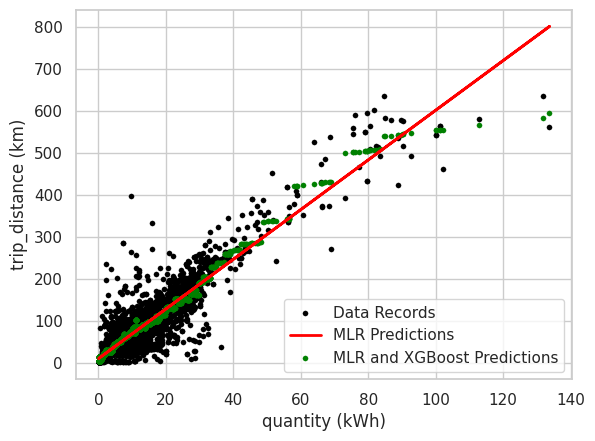

In [186]:
df = pd.read_csv('/content/Preprocessed_Data.csv')

# Select a single feature for visualization
selected_feature = 'quantity(kWh)'

# Prepare the data
X = df[[selected_feature]]
y = df['trip_distance(km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
quantity_linear_reg = LinearRegression()
quantity_linear_reg.fit(X_train, y_train)
# Make predictions
y_pred__linear_reg = quantity_linear_reg.predict(X_test)
# q_slope = quantity_linear_reg.coef_[0]
# q_intercept = quantity_linear_reg.intercept_
# q_predicted_distances_lr = q_intercept + q_slope * quantity

# Train Random Forest Regressor
reg_xgb_model = combine_models(XGB_regressor, linear_regressor)
reg_xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_reg_xgb = reg_xgb_model.predict(X_test)

# Plotting
fig = plt.figure()
# Plot the actual values
plt.scatter(X_test, y_test, label='Data Records',s=15, c='black', linewidths=0.1)
# Plot MLR predictions
plt.plot(X_test, y_pred__linear_reg, label='MLR Predictions',c='red', linewidth=2)
# Plot MLR_XGB predictions
plt.scatter(X_test, y_pred_reg_xgb, label='MLR and XGBoost Predictions',s=15, c='green', linewidths=0.1)
plt.legend(loc='lower right')
# plt.title('MLR and XGBoost Predictions')
plt.xlabel('quantity (kWh)'), plt.ylabel('trip_distance (km)')
plt.show()
# fig.savefig('lr_xgb_predictions.png')


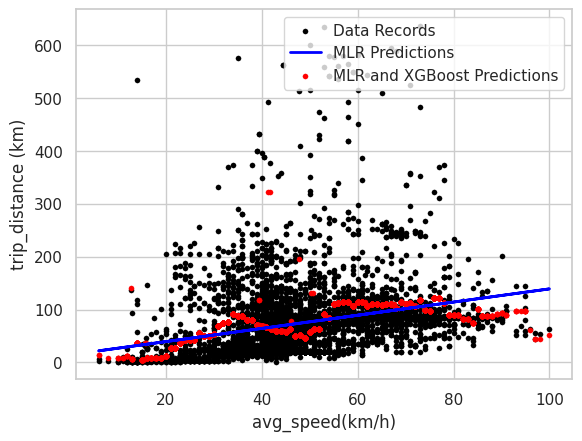

In [187]:
df = pd.read_csv('/content/Preprocessed_Data.csv')

# Select a single feature for visualization
selected_feature = 'avg_speed(km/h)'

# Prepare the data
X = df[[selected_feature]]
y = df['trip_distance(km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
quantity_linear_reg = LinearRegression()
quantity_linear_reg.fit(X_train, y_train)
# Make predictions
y_pred__linear_reg = quantity_linear_reg.predict(X_test)
# q_slope = quantity_linear_reg.coef_[0]
# q_intercept = quantity_linear_reg.intercept_
# q_predicted_distances_lr = q_intercept + q_slope * quantity

# Train Random Forest Regressor
reg_xgb_model = combine_models(XGB_regressor, linear_regressor)
reg_xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_reg_xgb = reg_xgb_model.predict(X_test)

# Plotting
fig = plt.figure()
# Plot the actual values
plt.scatter(X_test, y_test, label='Data Records',s=15, c='black', linewidths=0.1)
# Plot MLR predictions
plt.plot(X_test, y_pred__linear_reg, label='MLR Predictions',c='blue', linewidth=2)
# Plot MLR_XGB predictions
plt.scatter(X_test, y_pred_reg_xgb, label='MLR and XGBoost Predictions',s=15, c='red', linewidths=0.1)
plt.legend(loc='upper right')
# plt.title('MLR and XGBoost Predictions')
plt.xlabel('avg_speed(km/h)'), plt.ylabel('trip_distance (km)')
plt.show()
# fig.savefig('lr_xgb_predictions.png')


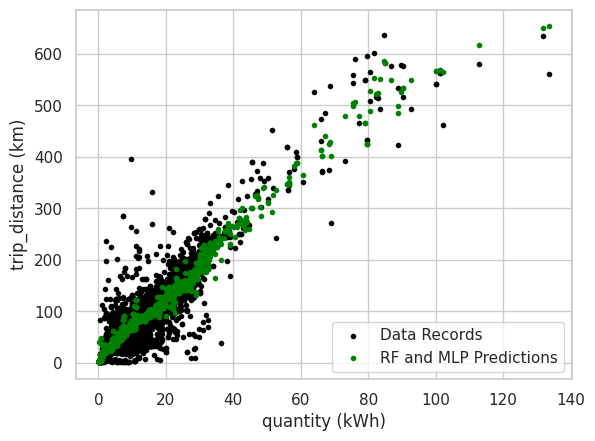

In [188]:
df = pd.read_csv('/content/Preprocessed_Data.csv')

# Select a single feature for visualization
selected_feature = 'quantity(kWh)'

# Prepare the data
X = df[[selected_feature]]
y = df['trip_distance(km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_mlp_model = combine_models(rf, mlp)
rf_mlp_model.fit(X_train, y_train)
# Make predictions
y_pred_reg_xgb = rf_mlp_model.predict(X_test)

# Plotting
fig = plt.figure()
# Plot the actual values
plt.scatter(X_test, y_test, label='Data Records',s=15, c='black', linewidths=0.1)
# Plot rf_mlp_model predictions
plt.scatter(X_test, y_pred_reg_xgb, label='RF and MLP Predictions',s=15, c='green', linewidths=0.1)
plt.legend(loc='lower right')
# plt.title('MLR and XGBoost Predictions')
plt.xlabel('quantity (kWh)'), plt.ylabel('trip_distance (km)')
plt.show()
# fig.savefig('lr_xgb_predictions.png')


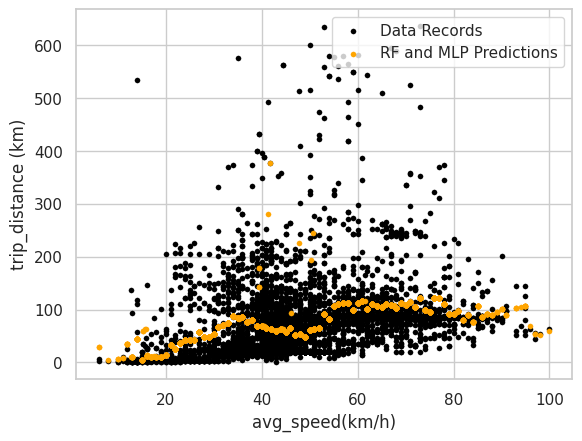

In [189]:
df = pd.read_csv('/content/Preprocessed_Data.csv')

# Select a single feature for visualization
selected_feature = 'avg_speed(km/h)'

# Prepare the data
X = df[[selected_feature]]
y = df['trip_distance(km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_mlp_model = combine_models(rf, mlp)
rf_mlp_model.fit(X_train, y_train)
# Make predictions
y_pred_reg_xgb = rf_mlp_model.predict(X_test)

# Plotting
fig = plt.figure()
# Plot the actual values
plt.scatter(X_test, y_test, label='Data Records',s=15, c='black', linewidths=0.1)
# Plot rf_mlp_model predictions
plt.scatter(X_test, y_pred_reg_xgb, label='RF and MLP Predictions',s=15, c='orange', linewidths=0.1)
plt.legend(loc='upper right')
# plt.title('MLR and XGBoost Predictions')
plt.xlabel('avg_speed(km/h)'), plt.ylabel('trip_distance (km)')
plt.show()
# fig.savefig('lr_xgb_predictions.png')
